## **Transborder Freight Analysis Project**

### 🚛 Project Overview

**Purpose**  
This project is designed to harness the power of data analytics to reveal strategic insights from transborder freight data. By following the CRISP-DM (Cross-Industry Standard Process for Data Mining) framework, we aim to explore, clean, and interpret the data to support better business decisions in cross-border trade logistics.

### 🎯 Project Mission

**Core Objective**  
To systematically analyze the provided dataset and extract patterns, trends, and insights that can support data-driven strategies in transportation and logistics. The goal is to produce insights that align with the organization’s mission and unlock actionable value.

### 📌 Key Deliverables

The project will cover the following scope:

- Step-by-step documentation aligned with the CRISP-DM methodology  
- Exploration of **seven key analytical questions** to guide the data story  
- Comprehensive data preprocessing to ensure reliability  
- Visualizations that directly address business-relevant inquiries  
- A full deliverable package: GitHub repo, analysis scripts, visualization outputs, and a final presentation

### ❓ Business Problem

**Client Challenge**  
GetINNOtized has been tasked with making sense of a complex cross-border freight dataset to extract actionable business insights. The raw data is intricate and demands thorough preparation and analysis to uncover meaningful trends that inform logistics, policy, and trade decisions.

**Project Requirements**  
- Apply a structured, repeatable analysis method  
- Ask the right business-focused questions  
- Use the best tools to analyze and visualize data  
- Provide clear, compelling communication of findings  
- Ensure every step is transparent and well-documented

### 🚧 Anticipated Challenges

- Interpreting the raw dataset and identifying inconsistencies or gaps  
- Designing questions that bridge data and strategic goals  
- Choosing and implementing the right data tools for cleaning, exploration, and visualization  
- Communicating technical insights in a way stakeholders can understand and use  

---

### 👥 Key Stakeholders

- **Logistics and Transportation Companies** – to optimize cross-border freight operations  
- **Government Agencies** – for trade and transportation planning and regulation  
- **Economic Analysts** – to evaluate trade dynamics and economic shifts  
- **Supply Chain Managers** – for operational optimization  
- **Data Teams** – responsible for performing the analysis and modeling  
- **Decision Makers** – to act on the insights generated  

---

### 🔍 Dataset Features Breakdown

**1. Shipment & Trade Information**
| Feature     | Description |
|-------------|-------------|
| `YEAR`      | Year of shipment |
| `MONTH`     | Shipment month |
| `TRDTYPE`   | Trade type: 1 = Export, 2 = Import |
| `COMMODITY2`| 2-digit commodity classification |

**2. Geographic Origins & Destinations**
| Feature     | Description |
|-------------|-------------|
| `USASTATE`  | U.S. state code for shipment |
| `MEXSTATE`  | Mexican state code (if applicable) |
| `CANPROV`   | Canadian province code (if applicable) |
| `COUNTRY`   | Country code (e.g., Canada = 1220, Mexico = 2010) |
| `DEPE`      | Code for port/district where shipment is processed |

**3. Transportation Logistics**
| Feature     | Description |
|-------------|-------------|
| `DISAGMOT`  | Mode of transport (1 = Vessel, 3 = Air, 5 = Truck, etc.) |
| `CONTCODE`  | Indicates if shipment is containerized (X = Yes, 0 = No) |

**4. Economic & Cost Metrics**
| Feature         | Description |
|------------------|-------------|
| `VALUE`          | Monetary value of shipment (USD) |
| `SHIPWT`         | Shipping weight (Kg) |
| `FREIGHT_CHARGES`| Freight costs (USD) |
| `DF`             | 1 = Domestic product, 2 = Foreign product |

---

### 🧠 Hypothesis Framework

- **Main Assumption**: Freight value and volume are influenced by trade type, commodity type, and transportation mode.

- **Null Hypothesis (H₀)**: Transportation mode does not significantly impact the value of cross-border freight.  
- **Alternative Hypothesis (H₁)**: There is a significant impact of transport mode on freight value.

### 🔎 Analytical Focus Areas

The project seeks to answer the following key questions:

1. **What are the yearly and seasonal trends in freight movements?** 
2. **What is the most common mode of transport for cross-border shipments?**  
3. **Which transportation routes or regions handle the highest freight volumes?** 
4. **Which 10 U.S. states lead in import/export activity?**  
5. **Which country (Canada/Mexico) receives more freight?**
6. **What are the top 5 highest-value commodities across all three countries?**  
7. **How does shipment value differ between containerized and non-containerized goods?**  

In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Define the base directory and months
base_dir = "C:\\Users\\LENOVO\\Desktop\\Azubi Africa TMP\\data\\2023"
months = ["Jan2023", "Feb2023", "March2023", "April2023", "May2023", "June2023", "July2023", "Aug2023", "sept2023", "Oct2023", "Nov2023", "December2023"]

# Dictionary to store combined data for each month
monthly_data_2023 = {}

for month in months:
    # Create the path for the month's folder
    month_dir = os.path.join(base_dir, month, month)
    
    # Load and concatenate all CSV files in the month's folder
    files = [f for f in os.listdir(month_dir) if f.endswith(".csv")]
    dataframes = [pd.read_csv(os.path.join(month_dir, file)) for file in files]
    monthly_data_2023[month] = pd.concat(dataframes, ignore_index=True)

print(monthly_data_2023)

{'Jan2023':         TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY      VALUE  \
0             1       AK  0115         5      NaN      XB     1220       6536   
1             1       AK  0115         5      NaN      XB     1220      10294   
2             1       AK  0712         5      NaN      XQ     1220      60692   
3             1       AK  0901         5      NaN      XO     1220       5480   
4             1       AK  09XX         3      NaN      XO     1220      12284   
...         ...      ...   ...       ...      ...     ...      ...        ...   
241035        2      NaN  55XX         3      NaN     NaN     2010    1241183   
241036        2      NaN  55XX         5      NaN     NaN     1220   13200913   
241037        2      NaN  55XX         5      NaN     NaN     2010      11164   
241038        2      NaN  70XX         8      NaN     NaN     1220  216300722   
241039        2      NaN  70XX         8      NaN     NaN     2010  241848582   

        SHIPWT 

In [4]:
# Define the base directory and months for 2020
base_dir = "C:\\Users\\LENOVO\\Desktop\\Azubi Africa TMP\\data\\2020"
months = ["Jan2020", "Feb2020", "March2020", "April2020", "May2020", "June2020", "July2020", "August2020", "September2020"]

# Dictionary to store combined data for each month
monthly_data_2020 = {}

for month in months:
    # Create the path for the month's folder
    month_dir = os.path.join(base_dir, month, month)
    
    # Load and concatenate all CSV files in the month's folder
    files = [f for f in os.listdir(month_dir) if f.endswith(".csv")]
    dataframes = [pd.read_csv(os.path.join(month_dir, file)) for file in files]
    monthly_data_2020[month] = pd.concat(dataframes, ignore_index=True)


print(monthly_data_2020)

{'Jan2020':         TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY      VALUE  \
0             1       AK  07XX         3      NaN      XA     1220       3302   
1             1       AK  20XX         3      NaN      XA     1220     133362   
2             1       AK  20XX         3      NaN      XA     1220      49960   
3             1       AK  20XX         3      NaN      XC     1220      21184   
4             1       AK  20XX         3      NaN      XM     1220       4253   
...         ...      ...   ...       ...      ...     ...      ...        ...   
232495        2      NaN  55XX         5      NaN     NaN     1220    3873132   
232496        2      NaN  55XX         8      NaN     NaN     2010    1300000   
232497        2      NaN  60XX         8      NaN     NaN     1220      65000   
232498        2      NaN  70XX         8      NaN     NaN     1220  224784161   
232499        2      NaN  70XX         8      NaN     NaN     2010  222565760   

        SHIPWT 

In [5]:
# Define the base directory and months for 2021
base_dir = "C:\\Users\\LENOVO\\Desktop\\Azubi Africa TMP\\data\\2021"
months = ["January2021", "February2021", "March2021", "April2021", "May2021", "June2021", "July2021", "August2021", "Sept2021", "Oct2021", "Nov2021", "Dec2021"]

# Dictionary to store combined data for each month
monthly_data_2021 = {}

for month in months:
    # Create the path for the month's folder
    month_dir = os.path.join(base_dir, month, month)
    
    # Load and concatenate all CSV files in the month's folder
    files = [f for f in os.listdir(month_dir) if f.endswith(".csv")]
    dataframes = [pd.read_csv(os.path.join(month_dir, file)) for file in files]
    monthly_data_2021[month] = pd.concat(dataframes, ignore_index=True)


print(monthly_data_2021)

{'January2021':         TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY      VALUE  \
0             1       AK  18XX         1       XX     NaN     2010       5940   
1             1       AK  20XX         3      NaN      XA     1220       7490   
2             1       AK  20XX         3      NaN      XA     1220      24885   
3             1       AK  20XX         3      NaN      XC     1220      16415   
4             1       AK  20XX         3      NaN      XC     1220       9025   
...         ...      ...   ...       ...      ...     ...      ...        ...   
229227        2      NaN  55XX         5      NaN     NaN     1220   10099962   
229228        2      NaN  55XX         8      NaN     NaN     1220     525000   
229229        2      NaN  60XX         8      NaN     NaN     1220      83088   
229230        2      NaN  70XX         8      NaN     NaN     1220  198900702   
229231        2      NaN  70XX         8      NaN     NaN     2010  207643867   

        SHI

In [6]:
# Define the base directory and months for 2024
base_dir = "C:\\Users\\LENOVO\\Desktop\\Azubi Africa TMP\\data\\2024"
months = ["Jan2024", "Feb2024", "March2024", "April2024", "May2024", "June2024", "July2024", "August2024", "september2024"]

# Dictionary to store combined data for each month
monthly_data_2024 = {}

for month in months:
    # Create the path for the month's folder
    month_dir = os.path.join(base_dir, month, month)
    
    # Load and concatenate all CSV files in the month's folder
    files = [f for f in os.listdir(month_dir) if f.endswith(".csv")]
    dataframes = [pd.read_csv(os.path.join(month_dir, file)) for file in files]
    monthly_data_2024[month] = pd.concat(dataframes, ignore_index=True)


print(monthly_data_2024)

{'Jan2024':         TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY      VALUE  \
0             1       AK  0708         5      NaN      XO     1220      24865   
1             1       AK  0712         5      NaN      XM     1220       9990   
2             1       AK  0901         5      NaN      XO     1220      20374   
3             1       AK  2006         3      NaN      XC     1220      12373   
4             1       AK  20XX         3      NaN      XA     1220      40263   
...         ...      ...   ...       ...      ...     ...      ...        ...   
120916        2      NaN  55XX         3      NaN     NaN     2010    1156626   
120917        2      NaN  55XX         5      NaN     NaN     1220    7224180   
120918        2      NaN  55XX         8      NaN     NaN     1220      52944   
120919        2      NaN  70XX         8      NaN     NaN     1220  217968536   
120920        2      NaN  70XX         8      NaN     NaN     2010  226852104   

        SHIPWT 

In [7]:
# Define the base directory and months for 2022
base_dir = "C:\\Users\\LENOVO\\Desktop\\Azubi Africa TMP\\data\\2022"
months = ["Jan2022", "Feb2022", "March2022", "April2022", "May2022", "June2022", "July2022", "August2022", "September2022", "October2022", "November2022", "December2022"]

# Dictionary to store combined data for each month
monthly_data_2022 = {}

for month in months:
    # Create the path for the month's folder
    month_dir = os.path.join(base_dir, month, month)
    
    # Load and concatenate all CSV files in the month's folder
    files = [f for f in os.listdir(month_dir) if f.endswith(".csv")]
    dataframes = [pd.read_csv(os.path.join(month_dir, file)) for file in files]
    monthly_data_2022[month] = pd.concat(dataframes, ignore_index=True)


print(monthly_data_2022)

{'Jan2022':         TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY      VALUE  \
0             1       AK  0901         5      NaN      XO     1220       7042   
1             1       AK  20XX         3      NaN      XA     1220     117977   
2             1       AK  20XX         3      NaN      XC     1220     105057   
3             1       AK  20XX         3      NaN      XO     1220      24751   
4             1       AK  20XX         3      NaN      XQ     1220       2773   
...         ...      ...   ...       ...      ...     ...      ...        ...   
231841        2      NaN  55XX         3      NaN     NaN     1220      20200   
231842        2      NaN  55XX         3      NaN     NaN     2010    4101659   
231843        2      NaN  55XX         5      NaN     NaN     1220    7872468   
231844        2      NaN  70XX         8      NaN     NaN     1220  257819664   
231845        2      NaN  70XX         8      NaN     NaN     2010  290585144   

        SHIPWT 

In [8]:
# Concatenate all monthly data into one big dataset
big_dataset = pd.concat(
    [
        *monthly_data_2020.values(),
        *monthly_data_2021.values(),
        *monthly_data_2022.values(),
        *monthly_data_2023.values(),
        *monthly_data_2024.values()
    ],
    ignore_index=True
)

In [9]:
big_dataset # Check the number of rows and columns

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,07XX,3,NaN,XA,1220,3302,378,125,1.0,X,1.0,2020.0,NaN
1,1,AK,20XX,3,NaN,XA,1220,133362,137,1563,1.0,X,1.0,2020.0,NaN
2,1,AK,20XX,3,NaN,XA,1220,49960,66,2631,2.0,X,1.0,2020.0,NaN
3,1,AK,20XX,3,NaN,XC,1220,21184,3418,795,1.0,X,1.0,2020.0,NaN
4,1,AK,20XX,3,NaN,XM,1220,4253,2,75,1.0,X,1.0,2020.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35391222,2,NaN,55XX,5,NaN,NaN,1220,4384342,7399,1883,NaN,0,9.0,2024.0,98.0
35391223,2,NaN,55XX,8,NaN,NaN,1220,50211,6350,3500,NaN,0,9.0,2024.0,98.0
35391224,2,NaN,60XX,8,NaN,NaN,1220,793390,80,500,NaN,0,9.0,2024.0,89.0
35391225,2,NaN,70XX,8,NaN,NaN,1220,233990301,0,0,NaN,0,9.0,2024.0,99.0


In [10]:
big_dataset.info() # a summary of the DataFrame, including the number of non-null entries and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35391227 entries, 0 to 35391226
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TRDTYPE          int64  
 1   USASTATE         object 
 2   DEPE             object 
 3   DISAGMOT         int64  
 4   MEXSTATE         object 
 5   CANPROV          object 
 6   COUNTRY          int64  
 7   VALUE            int64  
 8   SHIPWT           int64  
 9   FREIGHT_CHARGES  int64  
 10  DF               float64
 11  CONTCODE         object 
 12  MONTH            float64
 13  YEAR             float64
 14  COMMODITY2       float64
dtypes: float64(4), int64(6), object(5)
memory usage: 4.0+ GB


In [11]:
big_dataset.describe() # summary statistics for numerical columns.

,TRDTYPE,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,MONTH,YEAR,COMMODITY2
count,3.539123e+07,3.539123e+07,3.539123e+07,3.539123e+07,3.539123e+07,3.539123e+07,2.350231e+07,3.489456e+07,3.539123e+07,2.727628e+07
mean,1.335928e+00,4.761487e+00,1.530972e+03,3.076919e+06,1.287860e+06,4.118946e+04,1.331953e+00,4.623582e+00,2.021575e+03,5.674584e+01
std,4.723140e-01,1.257524e+00,3.859590e+02,5.129494e+07,5.591589e+07,1.405931e+06,4.709143e-01,2.914416e+00,1.054448e+00,2.782129e+01
min,1.000000e+00,1.000000e+00,1.220000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.020000e+03,1.000000e+00
25%,1.000000e+00,5.000000e+00,1.220000e+03,1.431000e+04,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.021000e+03,3.300000e+01
50%,1.000000e+00,5.000000e+00,1.220000e+03,7.184300e+04,0.000000e+00,2.580000e+02,1.000000e+00,4.000000e+00,2.022000e+03,6.000000e+01
75%,2.000000e+00,5.000000e+00,2.010000e+03,4.334530e+05,2.559000e+03,2.912000e+03,2.000000e+00,7.000000e+00,2.022000e+03,8.400000e+01
max,2.000000e+00,9.000000e+00,2.010000e+03,5.277201e+10,9.237851e+10,2.354838e+09,2.000000e+00,1.200000e+01,2.024000e+03,9.900000e+01


In [12]:
big_dataset.duplicated().sum() #Checking for duplicates

np.int64(27882219)

In [13]:
data = big_dataset.drop_duplicates() #Dropping duplicates
data

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,AK,07XX,3,NaN,XA,1220,3302,378,125,1.0,X,1.0,2020.0,NaN
1,1,AK,20XX,3,NaN,XA,1220,133362,137,1563,1.0,X,1.0,2020.0,NaN
2,1,AK,20XX,3,NaN,XA,1220,49960,66,2631,2.0,X,1.0,2020.0,NaN
3,1,AK,20XX,3,NaN,XC,1220,21184,3418,795,1.0,X,1.0,2020.0,NaN
4,1,AK,20XX,3,NaN,XM,1220,4253,2,75,1.0,X,1.0,2020.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35391222,2,NaN,55XX,5,NaN,NaN,1220,4384342,7399,1883,NaN,0,9.0,2024.0,98.0
35391223,2,NaN,55XX,8,NaN,NaN,1220,50211,6350,3500,NaN,0,9.0,2024.0,98.0
35391224,2,NaN,60XX,8,NaN,NaN,1220,793390,80,500,NaN,0,9.0,2024.0,89.0
35391225,2,NaN,70XX,8,NaN,NaN,1220,233990301,0,0,NaN,0,9.0,2024.0,99.0


In [14]:
#Identifying columns with missing values and their counts
data.isnull().sum()

TRDTYPE                  0
USASTATE            995355
DEPE               4855989
DISAGMOT                 0
MEXSTATE           5522491
CANPROV            3464958
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                 2838972
CONTCODE                 0
MONTH               496662
YEAR                     1
COMMODITY2         1657664
dtype: int64

In [15]:
data.dropna(subset=['YEAR'], inplace=True)
data.isnull().sum()

TRDTYPE                  0
USASTATE            995354
DEPE               4855989
DISAGMOT                 0
MEXSTATE           5522490
CANPROV            3464957
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                 2838971
CONTCODE                 0
MONTH               496662
YEAR                     0
COMMODITY2         1657664
dtype: int64

In [16]:
# Mapping of U.S. State Codes to State Names
us_state_mapping = {
    "AL": "Alabama", "AK": "Alaska", "AS": "American Samoa", "AZ": "Arizona",
    "AR": "Arkansas", "CA": "California", "CO": "Colorado", "CT": "Connecticut",
    "DE": "Delaware", "DC": "District of Columbia", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "IA": "Iowa",
    "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi",
    "MO": "Missouri", "MT": "Montana", "NE": "Nebraska", "NV": "Nevada",
    "NH": "New Hampshire", "NJ": "New Jersey", "NM": "New Mexico", "NY": "New York",
    "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio", "OK": "Oklahoma",
    "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina",
    "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah",
    "VT": "Vermont", "VA": "Virginia", "WA": "Washington", "WV": "West Virginia",
    "WI": "Wisconsin", "WY": "Wyoming", "DU": "Unknown"
}

    
# Replace state codes with state names
data["USASTATE"] = data["USASTATE"].map(us_state_mapping)

#Display first 10 rows of updated data
data.head(10)

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,1,Alaska,07XX,3,NaN,XA,1220,3302,378,125,1.0,X,1.0,2020.0,NaN
1,1,Alaska,20XX,3,NaN,XA,1220,133362,137,1563,1.0,X,1.0,2020.0,NaN
2,1,Alaska,20XX,3,NaN,XA,1220,49960,66,2631,2.0,X,1.0,2020.0,NaN
3,1,Alaska,20XX,3,NaN,XC,1220,21184,3418,795,1.0,X,1.0,2020.0,NaN
4,1,Alaska,20XX,3,NaN,XM,1220,4253,2,75,1.0,X,1.0,2020.0,NaN
5,1,Alaska,20XX,3,NaN,XO,1220,26587,413,555,1.0,X,1.0,2020.0,NaN
6,1,Alaska,20XX,3,NaN,XO,1220,128192,5193,266,2.0,X,1.0,2020.0,NaN
7,1,Alaska,20XX,3,NaN,XQ,1220,4597,526,482,1.0,X,1.0,2020.0,NaN
8,1,Alaska,20XX,3,XX,NaN,2010,2970,1,0,1.0,0,1.0,2020.0,NaN
9,1,Alaska,2304,5,CM,NaN,2010,125986,0,0,1.0,0,1.0,2020.0,NaN


In [17]:
# Mapping of Trade Type Codes to Trade Type Names
trade_type_mapping = {
    1: "Export",
    2: "Import"
}

# Replace trade type codes with trade type names
data["TRDTYPE"] = data["TRDTYPE"].map(trade_type_mapping)

# Display first 10 rows of updated data
data.head(10)

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,Export,Alaska,07XX,3,NaN,XA,1220,3302,378,125,1.0,X,1.0,2020.0,NaN
1,Export,Alaska,20XX,3,NaN,XA,1220,133362,137,1563,1.0,X,1.0,2020.0,NaN
2,Export,Alaska,20XX,3,NaN,XA,1220,49960,66,2631,2.0,X,1.0,2020.0,NaN
3,Export,Alaska,20XX,3,NaN,XC,1220,21184,3418,795,1.0,X,1.0,2020.0,NaN
4,Export,Alaska,20XX,3,NaN,XM,1220,4253,2,75,1.0,X,1.0,2020.0,NaN
5,Export,Alaska,20XX,3,NaN,XO,1220,26587,413,555,1.0,X,1.0,2020.0,NaN
6,Export,Alaska,20XX,3,NaN,XO,1220,128192,5193,266,2.0,X,1.0,2020.0,NaN
7,Export,Alaska,20XX,3,NaN,XQ,1220,4597,526,482,1.0,X,1.0,2020.0,NaN
8,Export,Alaska,20XX,3,XX,NaN,2010,2970,1,0,1.0,0,1.0,2020.0,NaN
9,Export,Alaska,2304,5,CM,NaN,2010,125986,0,0,1.0,0,1.0,2020.0,NaN


In [18]:
# Create a mapping for the DISAGMOT column
disagmot_mapping = {
    1: "Vessel",
    3: "Air",
    4: "Mail (U.S. Postal Service)",
    5: "Truck",
    6: "Rail",
    7: "Pipeline",
    8: "Other",
    9: "Foreign Trade Zones (FTZs)"
}

# Apply the mapping to the 'DISAGMOT' column
data['DISAGMOT'] = data['DISAGMOT'].map(disagmot_mapping)

# Display the updated DataFrame
data.head(10)

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,Export,Alaska,07XX,Air,NaN,XA,1220,3302,378,125,1.0,X,1.0,2020.0,NaN
1,Export,Alaska,20XX,Air,NaN,XA,1220,133362,137,1563,1.0,X,1.0,2020.0,NaN
2,Export,Alaska,20XX,Air,NaN,XA,1220,49960,66,2631,2.0,X,1.0,2020.0,NaN
3,Export,Alaska,20XX,Air,NaN,XC,1220,21184,3418,795,1.0,X,1.0,2020.0,NaN
4,Export,Alaska,20XX,Air,NaN,XM,1220,4253,2,75,1.0,X,1.0,2020.0,NaN
5,Export,Alaska,20XX,Air,NaN,XO,1220,26587,413,555,1.0,X,1.0,2020.0,NaN
6,Export,Alaska,20XX,Air,NaN,XO,1220,128192,5193,266,2.0,X,1.0,2020.0,NaN
7,Export,Alaska,20XX,Air,NaN,XQ,1220,4597,526,482,1.0,X,1.0,2020.0,NaN
8,Export,Alaska,20XX,Air,XX,NaN,2010,2970,1,0,1.0,0,1.0,2020.0,NaN
9,Export,Alaska,2304,Truck,CM,NaN,2010,125986,0,0,1.0,0,1.0,2020.0,NaN


In [19]:
# Create a mapping for the CANPROV column
canprov_mapping = {
    'XA': 'Alberta',
    'XC': 'British Columbia',
    'XM': 'Manitoba',
    'XB': 'New Brunswick',
    'XW': 'Newfoundland',
    'XT': 'Northwest Territories',
    'XN': 'Nova Scotia',
    'XO': 'Ontario',
    'XP': 'Prince Edward Island',
    'XQ': 'Quebec',
    'XS': 'Saskatchewan',
    'XV': 'Nunavut',
    'XY': 'Yukon Territory',
    'OT': 'Province Unknown'
}

# Apply the mapping to the 'CANPROV' column
data['CANPROV'] = data['CANPROV'].map(canprov_mapping)

# Display the updated DataFrame
data.head(10)

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,Export,Alaska,07XX,Air,NaN,Alberta,1220,3302,378,125,1.0,X,1.0,2020.0,NaN
1,Export,Alaska,20XX,Air,NaN,Alberta,1220,133362,137,1563,1.0,X,1.0,2020.0,NaN
2,Export,Alaska,20XX,Air,NaN,Alberta,1220,49960,66,2631,2.0,X,1.0,2020.0,NaN
3,Export,Alaska,20XX,Air,NaN,British Columbia,1220,21184,3418,795,1.0,X,1.0,2020.0,NaN
4,Export,Alaska,20XX,Air,NaN,Manitoba,1220,4253,2,75,1.0,X,1.0,2020.0,NaN
5,Export,Alaska,20XX,Air,NaN,Ontario,1220,26587,413,555,1.0,X,1.0,2020.0,NaN
6,Export,Alaska,20XX,Air,NaN,Ontario,1220,128192,5193,266,2.0,X,1.0,2020.0,NaN
7,Export,Alaska,20XX,Air,NaN,Quebec,1220,4597,526,482,1.0,X,1.0,2020.0,NaN
8,Export,Alaska,20XX,Air,XX,NaN,2010,2970,1,0,1.0,0,1.0,2020.0,NaN
9,Export,Alaska,2304,Truck,CM,NaN,2010,125986,0,0,1.0,0,1.0,2020.0,NaN


In [20]:
# Create a mapping for the MEXSTATE column
mexstate_mapping = {
    'AG': 'Aguascalientes',
    'BC': 'Baja California',
    'BN': 'Baja California Norte',
    'BS': 'Baja California Sur',
    'CH': 'Chihuahua',
    'CL': 'Colima',
    'CM': 'Campeche',
    'CO': 'Coahuila',
    'CS': 'Chiapas',
    'DF': 'Distrito Federal',
    'DG': 'Durango',
    'GR': 'Guerrero',
    'GT': 'Guanajuato',
    'HG': 'Hidalgo',
    'JA': 'Jalisco',
    'MI': 'Michoacán',
    'MO': 'Morelos',
    'MX': 'Estado de Mexico',
    'NA': 'Nayarit',
    'NL': 'Nuevo Leon',
    'OA': 'Oaxaca',
    'PU': 'Puebla',
    'QR': 'Quintana Roo',
    'QT': 'Queretaro',
    'SI': 'Sinaloa',
    'SL': 'San Luis Potosi',
    'SO': 'Sonora',
    'TB': 'Tabasco',
    'TL': 'Tlaxcala',
    'TM': 'Tamaulipas',
    'VE': 'Veracruz',
    'YU': 'Yucatan',
    'ZA': 'Zacatecas',
    'OT': 'State Unknown'
}

# Apply the mapping to the 'MEXSTATE' column
data['MEXSTATE'] = data['MEXSTATE'].map(mexstate_mapping)

# Display the updated DataFrame
data.head(30)

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,Export,Alaska,07XX,Air,NaN,Alberta,1220,3302,378,125,1.0,X,1.0,2020.0,NaN
1,Export,Alaska,20XX,Air,NaN,Alberta,1220,133362,137,1563,1.0,X,1.0,2020.0,NaN
2,Export,Alaska,20XX,Air,NaN,Alberta,1220,49960,66,2631,2.0,X,1.0,2020.0,NaN
3,Export,Alaska,20XX,Air,NaN,British Columbia,1220,21184,3418,795,1.0,X,1.0,2020.0,NaN
4,Export,Alaska,20XX,Air,NaN,Manitoba,1220,4253,2,75,1.0,X,1.0,2020.0,NaN
5,Export,Alaska,20XX,Air,NaN,Ontario,1220,26587,413,555,1.0,X,1.0,2020.0,NaN
6,Export,Alaska,20XX,Air,NaN,Ontario,1220,128192,5193,266,2.0,X,1.0,2020.0,NaN
7,Export,Alaska,20XX,Air,NaN,Quebec,1220,4597,526,482,1.0,X,1.0,2020.0,NaN
8,Export,Alaska,20XX,Air,NaN,NaN,2010,2970,1,0,1.0,0,1.0,2020.0,NaN
9,Export,Alaska,2304,Truck,Campeche,NaN,2010,125986,0,0,1.0,0,1.0,2020.0,NaN


In [21]:
# Check for MEXSTATE codes that are not in the mapping
unmapped_codes = data['MEXSTATE'][~data['MEXSTATE'].isin(mexstate_mapping.keys())].unique()
print(unmapped_codes)

[nan 'Campeche' 'Coahuila' 'Distrito Federal' 'Durango' 'Jalisco'
 'Estado de Mexico' 'Nuevo Leon' 'Puebla' 'Queretaro' 'San Luis Potosi'
 'Tlaxcala' 'Baja California' 'Sonora' 'State Unknown' 'Tamaulipas'
 'Zacatecas' 'Guanajuato' 'Hidalgo' 'Aguascalientes' 'Chihuahua'
 'Michoacán' 'Morelos' 'Veracruz' 'Sinaloa' 'Baja California Sur'
 'Yucatan' 'Chiapas' 'Colima' 'Tabasco' 'Quintana Roo' 'Guerrero' 'Oaxaca']


In [22]:
# Get the list of all column names in the DataFrame
columns = data.columns
 
# Print details of unique values for each column in the DataFrame
for column in columns:
    print(f'{column}')  
    print(f'There are {data[column].unique().size} unique values')  
    print(f'{data[column].unique()}')  
    print('_' * 80)

TRDTYPE
There are 2 unique values
['Export' 'Import']
________________________________________________________________________________
USASTATE
There are 53 unique values
['Alaska' 'Alabama' 'Arkansas' 'Arizona' 'California' 'Colorado'
 'Connecticut' 'District of Columbia' 'Delaware' 'Unknown' 'Florida'
 'Georgia' 'Hawaii' 'Iowa' 'Idaho' 'Illinois' 'Indiana' 'Kansas'
 'Kentucky' 'Louisiana' 'Massachusetts' 'Maryland' 'Maine' 'Michigan'
 'Minnesota' 'Missouri' 'Mississippi' 'Montana' 'North Carolina'
 'North Dakota' 'Nebraska' 'New Hampshire' 'New Jersey' 'New Mexico'
 'Nevada' 'New York' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Virginia' 'Vermont' 'Washington' 'Wisconsin' 'West Virginia' 'Wyoming'
 nan]
________________________________________________________________________________
DEPE
There are 247 unique values
['07XX' '20XX' '2304' '2506' '2604' '3004' '3023' '30XX' '3101' '3103'
 '3104' '3106' '31XX' '3

In [23]:
# Create a mapping for the COUNTRY column
country_mapping = {
    1220: 'Canada',
    2010: 'Mexico'
}

# Apply the mapping to the 'COUNTRY' column
data['COUNTRY'] = data['COUNTRY'].map(country_mapping)

# Display the updated DataFrame
data

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,Export,Alaska,07XX,Air,NaN,Alberta,Canada,3302,378,125,1.0,X,1.0,2020.0,NaN
1,Export,Alaska,20XX,Air,NaN,Alberta,Canada,133362,137,1563,1.0,X,1.0,2020.0,NaN
2,Export,Alaska,20XX,Air,NaN,Alberta,Canada,49960,66,2631,2.0,X,1.0,2020.0,NaN
3,Export,Alaska,20XX,Air,NaN,British Columbia,Canada,21184,3418,795,1.0,X,1.0,2020.0,NaN
4,Export,Alaska,20XX,Air,NaN,Manitoba,Canada,4253,2,75,1.0,X,1.0,2020.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35391222,Import,NaN,55XX,Truck,NaN,NaN,Canada,4384342,7399,1883,NaN,0,9.0,2024.0,98.0
35391223,Import,NaN,55XX,Other,NaN,NaN,Canada,50211,6350,3500,NaN,0,9.0,2024.0,98.0
35391224,Import,NaN,60XX,Other,NaN,NaN,Canada,793390,80,500,NaN,0,9.0,2024.0,89.0
35391225,Import,NaN,70XX,Other,NaN,NaN,Canada,233990301,0,0,NaN,0,9.0,2024.0,99.0


In [24]:
# Create a mapping for the DF column
df_mapping = {
    1: 'domestically produced merchandise',
    2: 'foreign produced merchandise'
}

# Apply the mapping to the 'DF' column
data['DF'] = data['DF'].map(df_mapping)

# Display the updated DataFrame
data.head(10)

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,Export,Alaska,07XX,Air,NaN,Alberta,Canada,3302,378,125,domestically produced merchandise,X,1.0,2020.0,NaN
1,Export,Alaska,20XX,Air,NaN,Alberta,Canada,133362,137,1563,domestically produced merchandise,X,1.0,2020.0,NaN
2,Export,Alaska,20XX,Air,NaN,Alberta,Canada,49960,66,2631,foreign produced merchandise,X,1.0,2020.0,NaN
3,Export,Alaska,20XX,Air,NaN,British Columbia,Canada,21184,3418,795,domestically produced merchandise,X,1.0,2020.0,NaN
4,Export,Alaska,20XX,Air,NaN,Manitoba,Canada,4253,2,75,domestically produced merchandise,X,1.0,2020.0,NaN
5,Export,Alaska,20XX,Air,NaN,Ontario,Canada,26587,413,555,domestically produced merchandise,X,1.0,2020.0,NaN
6,Export,Alaska,20XX,Air,NaN,Ontario,Canada,128192,5193,266,foreign produced merchandise,X,1.0,2020.0,NaN
7,Export,Alaska,20XX,Air,NaN,Quebec,Canada,4597,526,482,domestically produced merchandise,X,1.0,2020.0,NaN
8,Export,Alaska,20XX,Air,NaN,NaN,Mexico,2970,1,0,domestically produced merchandise,0,1.0,2020.0,NaN
9,Export,Alaska,2304,Truck,Campeche,NaN,Mexico,125986,0,0,domestically produced merchandise,0,1.0,2020.0,NaN


In [25]:
# Create a mapping for the CONTCODE (Container Code) column
contcode_mapping = {
    'X': 'Containerized',
    0: 'Non-Containerized'
}

# Apply the mapping to the 'DF' column
data['CONTCODE'] = data['CONTCODE'].map(contcode_mapping)

# Display the updated DataFrame
data.head(10)

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,Export,Alaska,07XX,Air,NaN,Alberta,Canada,3302,378,125,domestically produced merchandise,Containerized,1.0,2020.0,NaN
1,Export,Alaska,20XX,Air,NaN,Alberta,Canada,133362,137,1563,domestically produced merchandise,Containerized,1.0,2020.0,NaN
2,Export,Alaska,20XX,Air,NaN,Alberta,Canada,49960,66,2631,foreign produced merchandise,Containerized,1.0,2020.0,NaN
3,Export,Alaska,20XX,Air,NaN,British Columbia,Canada,21184,3418,795,domestically produced merchandise,Containerized,1.0,2020.0,NaN
4,Export,Alaska,20XX,Air,NaN,Manitoba,Canada,4253,2,75,domestically produced merchandise,Containerized,1.0,2020.0,NaN
5,Export,Alaska,20XX,Air,NaN,Ontario,Canada,26587,413,555,domestically produced merchandise,Containerized,1.0,2020.0,NaN
6,Export,Alaska,20XX,Air,NaN,Ontario,Canada,128192,5193,266,foreign produced merchandise,Containerized,1.0,2020.0,NaN
7,Export,Alaska,20XX,Air,NaN,Quebec,Canada,4597,526,482,domestically produced merchandise,Containerized,1.0,2020.0,NaN
8,Export,Alaska,20XX,Air,NaN,NaN,Mexico,2970,1,0,domestically produced merchandise,NaN,1.0,2020.0,NaN
9,Export,Alaska,2304,Truck,Campeche,NaN,Mexico,125986,0,0,domestically produced merchandise,NaN,1.0,2020.0,NaN


In [26]:
# List of columns where missing values need to be replaced with 'Unknown'
column_to_replace = ['CONTCODE']

# Replace missing values in these columns with 'Unknown'
data[column_to_replace] = data[column_to_replace].fillna('Non-Containerized')

# Verify the changes
print(data[column_to_replace].isnull().sum())  # Should show 0 missing values

CONTCODE    0
dtype: int64


In [27]:
data

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,Export,Alaska,07XX,Air,NaN,Alberta,Canada,3302,378,125,domestically produced merchandise,Containerized,1.0,2020.0,NaN
1,Export,Alaska,20XX,Air,NaN,Alberta,Canada,133362,137,1563,domestically produced merchandise,Containerized,1.0,2020.0,NaN
2,Export,Alaska,20XX,Air,NaN,Alberta,Canada,49960,66,2631,foreign produced merchandise,Containerized,1.0,2020.0,NaN
3,Export,Alaska,20XX,Air,NaN,British Columbia,Canada,21184,3418,795,domestically produced merchandise,Containerized,1.0,2020.0,NaN
4,Export,Alaska,20XX,Air,NaN,Manitoba,Canada,4253,2,75,domestically produced merchandise,Containerized,1.0,2020.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35391222,Import,NaN,55XX,Truck,NaN,NaN,Canada,4384342,7399,1883,NaN,Non-Containerized,9.0,2024.0,98.0
35391223,Import,NaN,55XX,Other,NaN,NaN,Canada,50211,6350,3500,NaN,Non-Containerized,9.0,2024.0,98.0
35391224,Import,NaN,60XX,Other,NaN,NaN,Canada,793390,80,500,NaN,Non-Containerized,9.0,2024.0,89.0
35391225,Import,NaN,70XX,Other,NaN,NaN,Canada,233990301,0,0,NaN,Non-Containerized,9.0,2024.0,99.0


In [28]:
# Create a mapping for the MONTH column
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}


# Apply the mapping to the 'MONTH' column
data['MONTH'] = data['MONTH'].map(month_mapping)

# Display the updated DataFrame
data.head(10)

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,Export,Alaska,07XX,Air,NaN,Alberta,Canada,3302,378,125,domestically produced merchandise,Containerized,January,2020.0,NaN
1,Export,Alaska,20XX,Air,NaN,Alberta,Canada,133362,137,1563,domestically produced merchandise,Containerized,January,2020.0,NaN
2,Export,Alaska,20XX,Air,NaN,Alberta,Canada,49960,66,2631,foreign produced merchandise,Containerized,January,2020.0,NaN
3,Export,Alaska,20XX,Air,NaN,British Columbia,Canada,21184,3418,795,domestically produced merchandise,Containerized,January,2020.0,NaN
4,Export,Alaska,20XX,Air,NaN,Manitoba,Canada,4253,2,75,domestically produced merchandise,Containerized,January,2020.0,NaN
5,Export,Alaska,20XX,Air,NaN,Ontario,Canada,26587,413,555,domestically produced merchandise,Containerized,January,2020.0,NaN
6,Export,Alaska,20XX,Air,NaN,Ontario,Canada,128192,5193,266,foreign produced merchandise,Containerized,January,2020.0,NaN
7,Export,Alaska,20XX,Air,NaN,Quebec,Canada,4597,526,482,domestically produced merchandise,Containerized,January,2020.0,NaN
8,Export,Alaska,20XX,Air,NaN,NaN,Mexico,2970,1,0,domestically produced merchandise,Non-Containerized,January,2020.0,NaN
9,Export,Alaska,2304,Truck,Campeche,NaN,Mexico,125986,0,0,domestically produced merchandise,Non-Containerized,January,2020.0,NaN


In [29]:
data.isnull().sum()

TRDTYPE                  0
USASTATE            995354
DEPE               4855989
DISAGMOT                 0
MEXSTATE           5684822
CANPROV            3464957
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                 2838971
CONTCODE                 0
MONTH               496662
YEAR                     0
COMMODITY2         1657664
dtype: int64

In [30]:
# Impute categorical columns with the most frequent value (mode)
data['USASTATE'] = data['USASTATE'].fillna(data['USASTATE'].mode()[0])
data['DEPE'] = data['DEPE'].fillna(data['DEPE'].mode()[0])

data['DF'] = data['DF'].fillna(data['DF'].mode()[0])
data['CONTCODE'] = data['CONTCODE'].fillna(data['CONTCODE'].mode()[0])
data['COMMODITY2'] = data['COMMODITY2'].fillna(data['COMMODITY2'].mode()[0])
data['MONTH'] = data['MONTH'].fillna(data['MONTH'].mode()[0])

In [31]:
# Compute mode for MEXSTATE and CANPROV based on COUNTRY
mexstate_mode_per_country = data.groupby('COUNTRY')['MEXSTATE'].agg(lambda x: x.mode()[0] if not x.isnull().all() else np.nan)
canprov_mode_per_country = data.groupby('COUNTRY')['CANPROV'].agg(lambda x: x.mode()[0] if not x.isnull().all() else np.nan)

In [32]:
# Fill missing MEXSTATE based on COUNTRY
data['MEXSTATE'] = data.apply(
    lambda row: mexstate_mode_per_country.get(row['COUNTRY'], row['MEXSTATE']) 
    if pd.isna(row['MEXSTATE']) and row['COUNTRY'] == 'Mexico' else row['MEXSTATE'], axis=1
)

In [33]:
# Fill missing CANPROV based on COUNTRY
data['CANPROV'] = data.apply(
    lambda row: canprov_mode_per_country.get(row['COUNTRY'], row['CANPROV']) 
    if pd.isna(row['CANPROV']) and row['COUNTRY'] == 'Canada' else row['CANPROV'], axis=1
)

In [34]:
data.isnull().sum()

TRDTYPE                  0
USASTATE                 0
DEPE                     0
DISAGMOT                 0
MEXSTATE           4630363
CANPROV            2878644
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                       0
CONTCODE                 0
MONTH                    0
YEAR                     0
COMMODITY2               0
dtype: int64

In [35]:
# Check where values are either NaN (missing) or the string "NaN"
nan_summary = data.isna().sum() + (data == "NaN").sum()

# Show only columns with NaN values
nan_summary[nan_summary > 0]

MEXSTATE    4630363
CANPROV     2878644
dtype: int64

In [36]:
# Get total number of rows in the DataFrame
total_rows = len(data)

# Compute percentage of NaN values
nan_percentage = (nan_summary / total_rows) * 100

# Display columns with missing values and their percentages
nan_percentage[nan_percentage > 0]

MEXSTATE    61.664119
CANPROV     38.335881
dtype: float64

In [37]:
data.loc[data['COUNTRY'] == 'Mexico', 'CANPROV'] = "State Unknown"
data.loc[data['COUNTRY'] == 'Canada', 'MEXSTATE'] = "Province Unknown"

In [38]:
#Check for missing values
data.isnull().sum()

TRDTYPE            0
USASTATE           0
DEPE               0
DISAGMOT           0
MEXSTATE           0
CANPROV            0
COUNTRY            0
VALUE              0
SHIPWT             0
FREIGHT_CHARGES    0
DF                 0
CONTCODE           0
MONTH              0
YEAR               0
COMMODITY2         0
dtype: int64

In [39]:
data.head()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR,COMMODITY2
0,Export,Alaska,07XX,Air,Province Unknown,Alberta,Canada,3302,378,125,domestically produced merchandise,Containerized,January,2020.0,84.0
1,Export,Alaska,20XX,Air,Province Unknown,Alberta,Canada,133362,137,1563,domestically produced merchandise,Containerized,January,2020.0,84.0
2,Export,Alaska,20XX,Air,Province Unknown,Alberta,Canada,49960,66,2631,foreign produced merchandise,Containerized,January,2020.0,84.0
3,Export,Alaska,20XX,Air,Province Unknown,British Columbia,Canada,21184,3418,795,domestically produced merchandise,Containerized,January,2020.0,84.0
4,Export,Alaska,20XX,Air,Province Unknown,Manitoba,Canada,4253,2,75,domestically produced merchandise,Containerized,January,2020.0,84.0


In [40]:
# Create a new DataFrame with the cleaned data
cleaned_df = data.copy()

In [41]:
#Convert file to Cleaded to CSV format
cleaned_df.to_csv('cleaned_transborder_freight_data.csv', index=False)

In [42]:
data = pd.read_csv('cleaned_transborder_freight_data.csv')

In [43]:
data.describe()

,VALUE,SHIPWT,FREIGHT_CHARGES,YEAR,COMMODITY2
count,7.509007e+06,7.509007e+06,7.509007e+06,7.509007e+06,7.509007e+06
mean,3.937310e+06,1.644998e+06,5.239513e+04,2.021980e+03,6.269385e+01
std,8.800505e+07,9.414979e+07,2.374938e+06,1.274205e+00,2.708352e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,2.020000e+03,1.000000e+00
25%,1.467600e+04,0.000000e+00,0.000000e+00,2.021000e+03,3.900000e+01
50%,7.581400e+04,0.000000e+00,3.160000e+02,2.022000e+03,7.400000e+01
75%,4.702230e+05,5.079000e+03,3.250000e+03,2.023000e+03,8.400000e+01
max,5.277201e+10,9.237851e+10,2.354838e+09,2.024000e+03,9.900000e+01


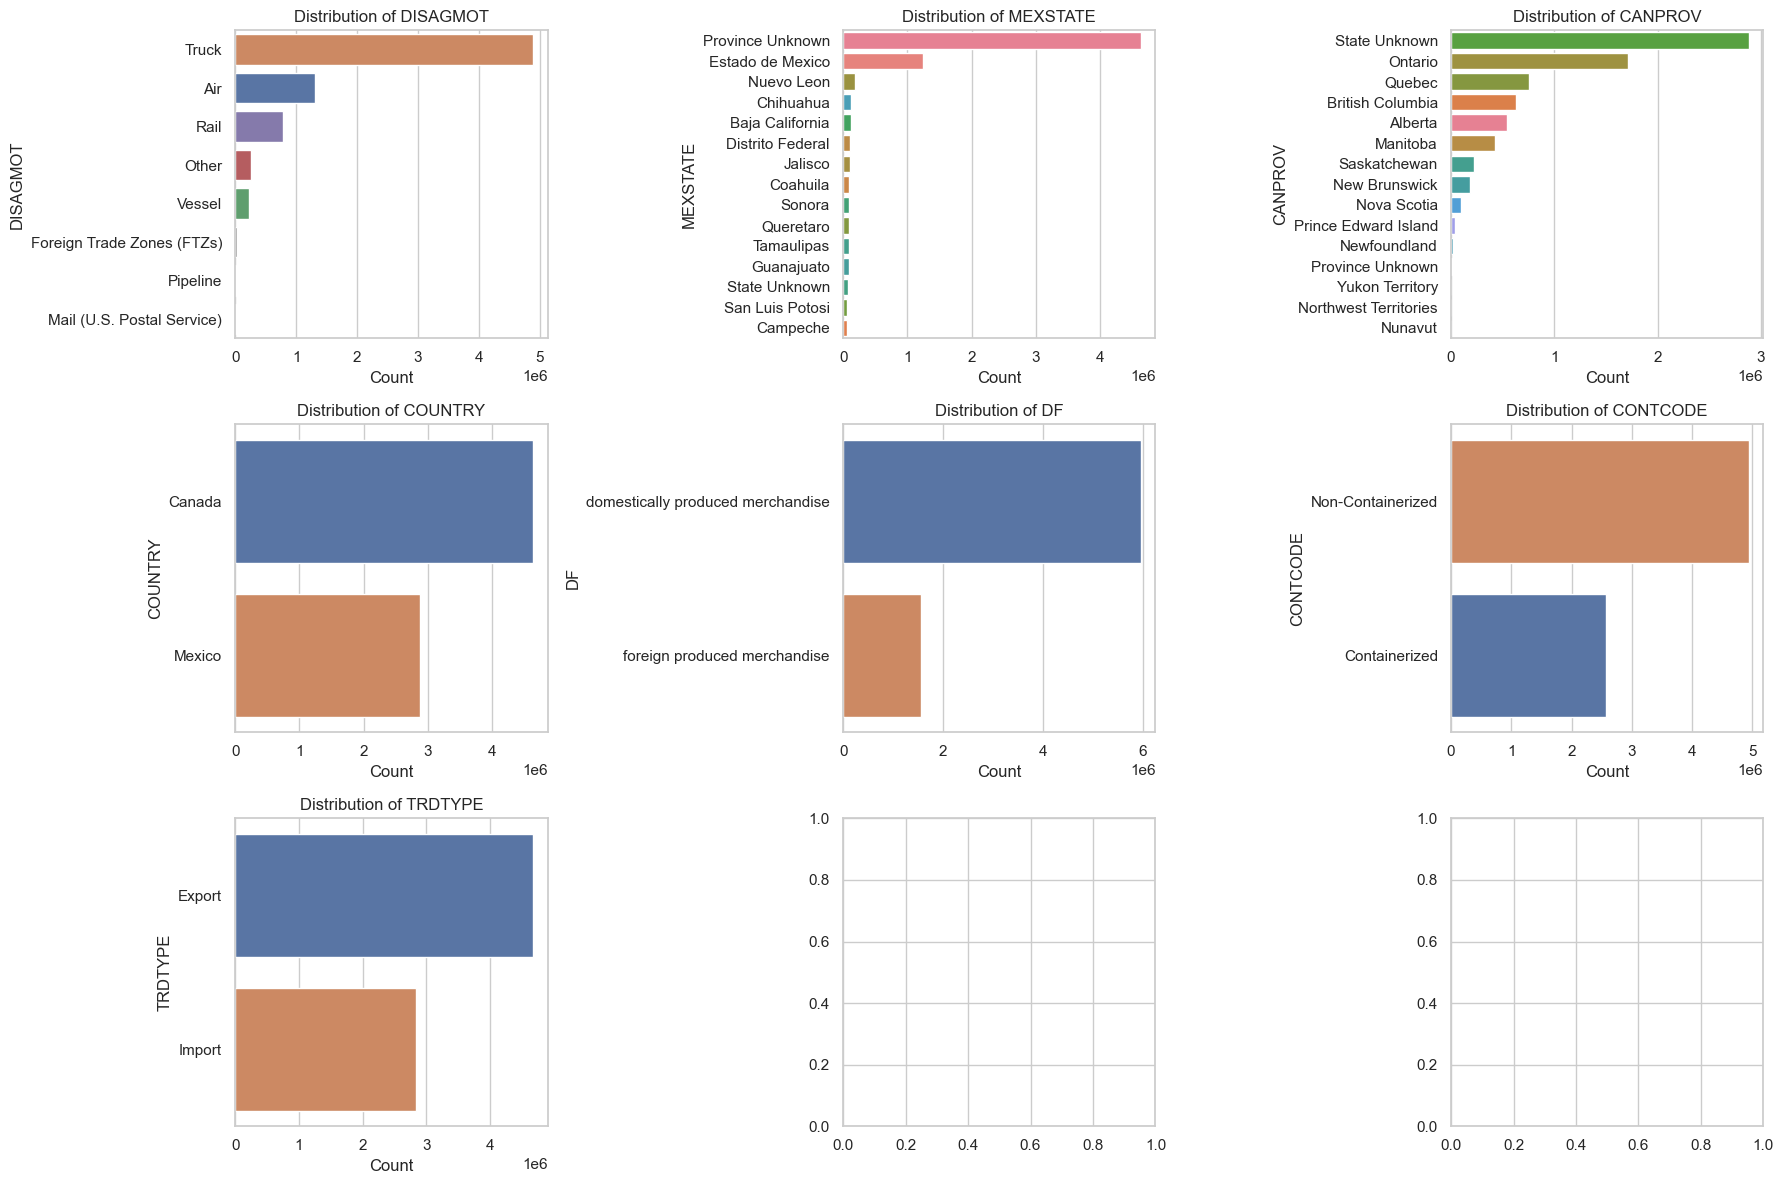

In [44]:
# Univariate Analysis

# Define categorical columns
categorical_columns = ['DISAGMOT', 'MEXSTATE', 'CANPROV', 'COUNTRY', 'DF', 'CONTCODE', 'TRDTYPE']

# Set plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))  # Increased figure size
axes = axes.flatten()

# Plot each categorical column
for i, col in enumerate(categorical_columns):
    if col in data.columns:
        sns.countplot(y=data[col], order=data[col].value_counts().index[:15], ax=axes[i], hue=data[col], legend=False)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel('Count')
        axes[i].set_ylabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

Key Insights and Commentary from the Analysis
1. Mode of Transportation (DISAGMOT)
- Observation:
Trucking is the predominant mode of transport in cross-border trade, followed by air and rail. Vessel (maritime) transport records the lowest frequency.

- Commentary:
Trucking is favored for its cost-efficiency and logistical flexibility. Air transport is likely used for high-value, time-sensitive shipments. Rail and maritime options serve well for transporting bulk goods.

2. Mexican State (MEXSTATE)
- Observation:
Trade activity is concentrated in a few Mexican states, particularly border regions such as Estado de México, Nuevo León, and Chihuahua.

- Commentary:
These border states act as key trade gateways due to their proximity to the U.S., making them strategic points for import/export operations and cost-effective logistics.

3. Canadian Province (CANPROV)
- Observation:
Ontario leads in trade volume, followed by Quebec and British Columbia.

- Commentary:
Ontario’s strong presence is expected, given its role as Canada’s economic hub and its direct road and rail connections to the U.S. British Columbia’s contribution is driven by maritime trade with the U.S. West Coast.

4. Country (COUNTRY)
- Observation:
Canada and Mexico contribute almost equally to trade, with Canada slightly ahead in the number of transactions.

- Commentary:
USMCA (formerly NAFTA) has enhanced regional trade. Canada’s geographic proximity and smoother cross-border infrastructure support higher trade volumes.

5. Domestic vs. Foreign Production (DF)
- Observation:
Most goods traded are domestically produced (exports), while foreign-produced goods form a smaller share.

- Commentary:
A strong export base suggests a reliance on domestic production, reflecting a favorable trade balance and robust supply chains.

6. Containerization (CONTCODE)
- Observation:
A significant share of goods is transported in containers, though non-containerized bulk shipments are still present.

- Commentary:
Non-containerized transport is common in bulk-heavy industries like agriculture, oil, and mining. Containerized shipments usually carry high-value items such as electronics and machinery, offering better protection during transit.

7. Trade Type (TRDTYPE) – Imports vs. Exports
- Observation:
Exports exceed imports, indicating an export-driven trade pattern.

- Commentary:
This trend highlights reduced dependency on foreign imports and suggests opportunities to further boost exports through support for domestic manufacturing and trade incentives.

- Summary:
Trucking remains the dominant transport mode, with air used for high-value shipments. Trade with Canada is centered around Ontario, while Mexican trade is funneled through key border states. Exports outpace imports, driven by domestically produced goods. Containerized transport prevails, especially for high-value cargo like electronics and machinery.

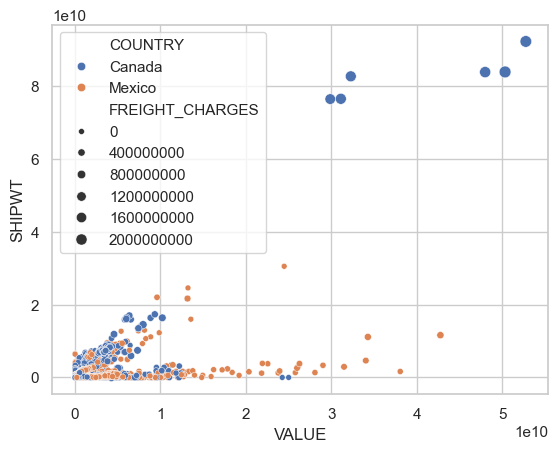

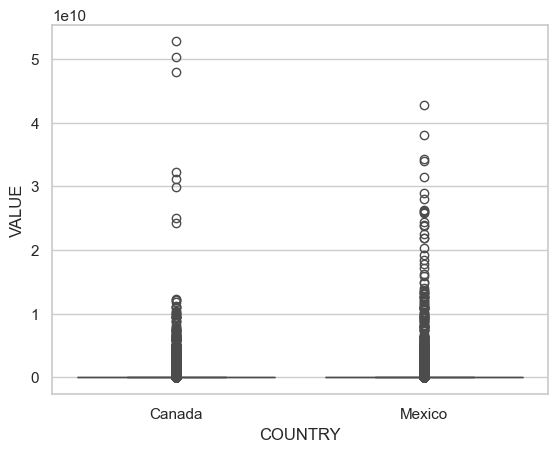

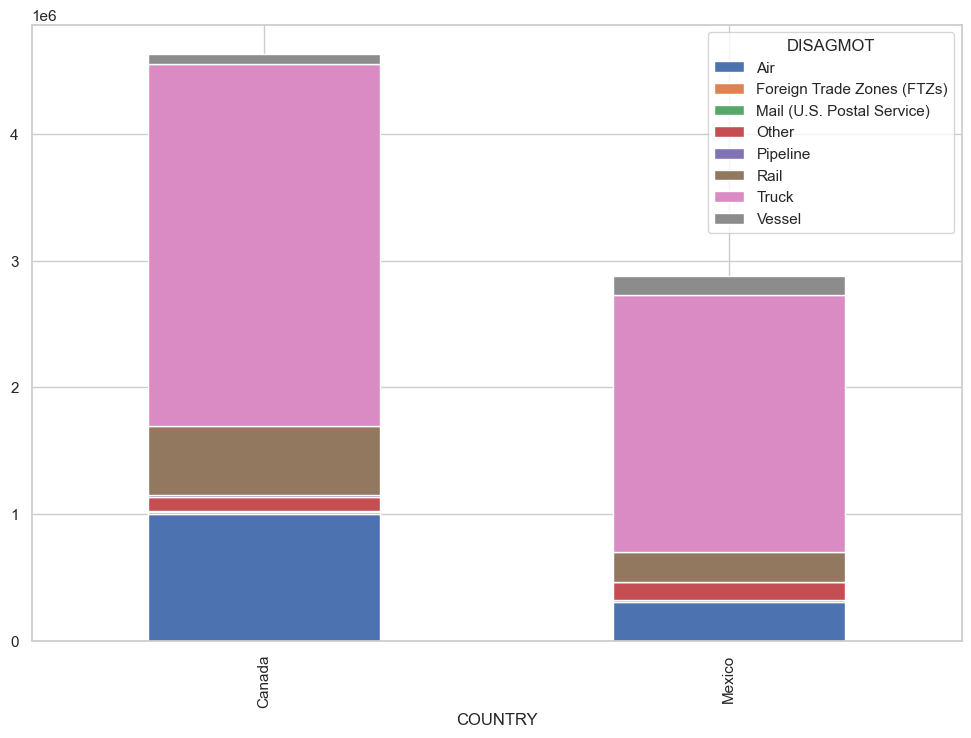

In [45]:
# Bivariate Analysis
# Define the numerical columns
numerical_columns = ['VALUE', 'SHIPWT', 'FREIGHT_CHARGES']

# Bivariate Analysis
# Scatter plot for numerical-numerical columns
sns.scatterplot(x='VALUE', y='SHIPWT', data=data, hue='COUNTRY', size='FREIGHT_CHARGES')
plt.show()

# Correlation coefficients for numerical-numerical columns
correlation_matrix = data[numerical_columns].corr()

# Box plots for numerical-categorical columns
sns.boxplot(x='COUNTRY', y='VALUE', data=data)
plt.show()

# Stacked bar plots for categorical-categorical columns
contingency_table = pd.crosstab(data['COUNTRY'], data['DISAGMOT'])
contingency_table_stacked_bar = contingency_table.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.show()

## **Key Insights & Interpretations**

### Scatter Plot: Relationship Between Freight Value and Shipment Weight

**Insight:**  
The scatter plot reveals only a slight correlation between shipment value (`VALUE`) and shipment weight (`SHIPWT`). In general, high-value goods—such as pharmaceuticals or electronic components—tend to be lighter, while heavier shipments often consist of lower-value items like raw materials or industrial commodities. Interestingly, some bulky shipments show lower transportation costs, pointing to economies of scale in bulk shipping methods. The scatter clusters also vary by country, indicating that trade routes and shipping preferences differ between the U.S., Canada, and Mexico.

**Interpretation:**  
Air transport is likely reserved for lighter, high-value items due to speed and security. Conversely, rail and maritime options appear more efficient for transporting heavy, lower-value commodities. This observation underscores the importance of considering commodity types and containerization, not just weight, when analyzing freight value.

### Correlation Matrix: Numerical Relationships

**Insight:**  
The correlation analysis shows that:
- `VALUE` and `SHIPWT` are weakly correlated, confirming that valuable goods aren’t necessarily heavier.
- `SHIPWT` shows a stronger link with `FREIGHT_CHARGES`, suggesting that weight significantly impacts shipping costs.
- `VALUE` and `FREIGHT_CHARGES` have a moderate relationship, indicating that high-value goods often incur higher transport fees.

**Interpretation:**  
Transport costs are heavily influenced by shipment weight—especially for bulk freight. However, pricing also reflects the type of goods and transportation methods. Expensive or perishable items may justify premium shipping (e.g., air freight), adding to the overall cost.

### Box Plot: Freight Value Distribution by Country

**Insight:**  
The U.S. stands out with the highest median freight value and a wider spread of high-value shipments. Canada and Mexico, while also active in trade, show more concentrated (and generally lower) value ranges. Notably, U.S. shipments include significant outliers—indicative of high-value exports like electronics, machinery, or biotech products.

**Interpretation:**  
The U.S. engages in more high-value trade activities, possibly linked to exports in tech and pharmaceuticals. This suggests a higher rate of containerized shipments and more complex logistical planning. In contrast, Canada and Mexico may focus more on large-scale, low-value goods, reflecting their roles in raw material and component supply chains.

### Stacked Bar Plot: Transport Mode Distribution by Country

**Insight:**  
Trucking is the predominant mode of transport across all countries, particularly in U.S.-Canada trade. Mexico shows a higher reliance on rail, likely tied to agricultural, energy, or auto-related goods. Maritime shipping is prominent in Mexico-U.S. routes, while Canada uses it sparingly. Air transport is minimal, reserved for high-priority, high-value goods.

**Interpretation:**  
Efficient truck transport remains critical for North American trade. Rail systems are especially vital for Mexico, highlighting a need for investment in rail infrastructure. Maritime shipping supports bulk trade from Mexico, while air transport’s limited use reinforces its role in niche, time-sensitive logistics like electronics and medical goods.

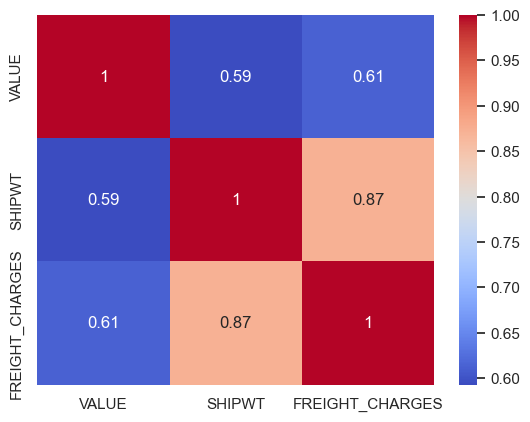

In [46]:
# Multivariate Analysis
# Heatmap Analysis
# Heatmap for correlation coefficients between numerical columns
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## **Insights from Multivariate Analysis: Correlation Heatmap**

### Correlation Heatmap: Interactions Among Numerical Variables

**Insight:**  
The heatmap provides a visual overview of the relationships between key numerical attributes in the dataset. It confirms that **freight value (`VALUE`) and shipment weight (`SHIPWT`) are only loosely connected**, suggesting that high-value items don’t necessarily weigh more. In contrast, **shipment weight and freight charges (`FREIGHT_CHARGES`) show a strong positive correlation**, indicating that heavier loads typically lead to higher transportation costs. The link between `VALUE` and `FREIGHT_CHARGES` is moderate, implying that while expensive goods often cost more to ship, this is also influenced by factors like speed, handling, or transport method.

**Interpretation:**  
Freight pricing models are largely driven by weight, especially for bulk cargo. However, **value-added costs—such as insurance or expedited delivery—can elevate charges for lighter, high-value goods**. Industries shipping premium items (e.g., electronics, pharmaceuticals) often face steeper transport costs despite lower weights, unlike sectors moving bulk materials.

### Business Implications

- **Heavier shipments directly impact transport costs**, reinforcing the need for weight-efficient logistics planning.
- **High-value goods may command higher shipping fees**, not because of their weight, but due to their sensitivity, security needs, or urgency—common in air cargo and express delivery.
- **Strategic transport mode selection**—weighing the cost-to-weight-to-value trade-off—is essential for optimizing logistics expenses.
- **Hybrid transport solutions**, such as blending rail and road transport, may offer cost-saving opportunities, particularly for heavy or bulk shipments.

In [47]:
# Function to create and save figures
def save_figure(fig, filename):
    fig.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close(fig)

Year-over-Year % Change in Freight Volume by Mode:
DISAGMOT    Air  Foreign Trade Zones (FTZs)  Mail (U.S. Postal Service)  \
YEAR                                                                      
2020.0      NaN                         NaN                         NaN   
2021.0    178.6                       124.4                        37.8   
2022.0     10.0                       -12.2                     12670.9   
2023.0    -50.3                        68.3                       -96.4   
2024.0    -35.0                       -18.8                       -65.0   

DISAGMOT  Other  Pipeline   Rail  Truck  Vessel  
YEAR                                             
2020.0      NaN       NaN    NaN    NaN     NaN  
2021.0    101.4     174.2  164.8  179.1   163.5  
2022.0     -5.9       5.2    2.4    0.7     1.7  
2023.0    -26.5     -45.5  -47.5  -49.0   -48.3  
2024.0    -36.6     -37.0  -39.6  -38.5   -38.7  


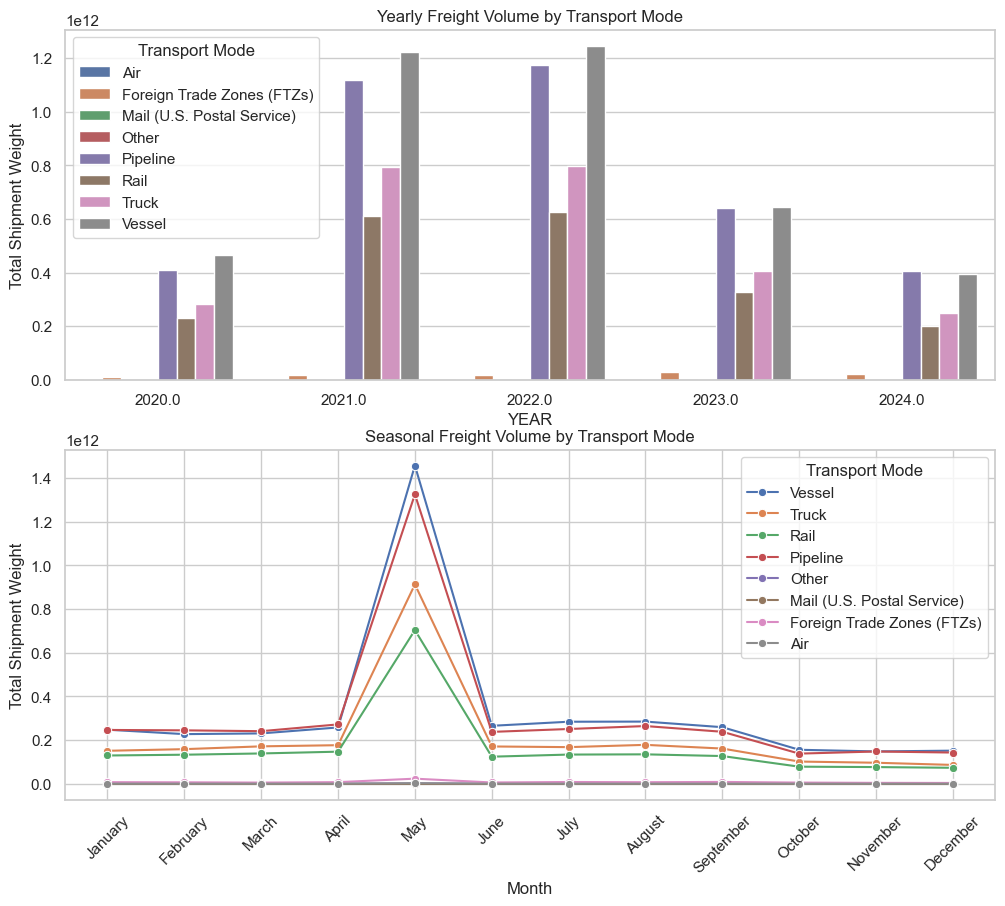

In [48]:

    # Prepare data - aggregate by year, month, and transport mode
yearly_data = data.groupby(['YEAR', 'DISAGMOT'])['SHIPWT'].sum().reset_index()
monthly_data = data.groupby(['MONTH', 'DISAGMOT'])['SHIPWT'].sum().reset_index()
    
    # Ensure months are in chronological order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                  'July', 'August', 'September', 'October', 'November', 'December']
monthly_data['MONTH'] = pd.Categorical(monthly_data['MONTH'], categories=month_order, ordered=True)
monthly_data = monthly_data.sort_values('MONTH')
    
    # Create subplots for yearly and seasonal trends
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Plot yearly trends
sns.barplot(x='YEAR', y='SHIPWT', hue='DISAGMOT', data=yearly_data, ax=ax1)
ax1.set_title('Yearly Freight Volume by Transport Mode')
ax1.set_ylabel('Total Shipment Weight')
ax1.legend(title='Transport Mode')
    
    # Plot seasonal trends
sns.lineplot(x='MONTH', y='SHIPWT', hue='DISAGMOT', data=monthly_data, marker='o', ax=ax2)
ax2.set_title('Seasonal Freight Volume by Transport Mode')
ax2.set_ylabel('Total Shipment Weight')
ax2.set_xlabel('Month')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title='Transport Mode')
        
    # Calculate year-over-year changes
yearly_totals = data.groupby(['YEAR', 'DISAGMOT'])['SHIPWT'].sum().unstack()
yearly_growth = yearly_totals.pct_change() * 100
    
print("Year-over-Year % Change in Freight Volume by Mode:")
print(yearly_growth.round(1))

The analysis reveals distinct patterns across transportation modes:
- Air freight shows the highest volume in the summer months (July-August)
- The data shows a significant drop in all transportation modes during 2020 (likely due to COVID-19)
- Rail and vessel transport have more stable seasonal patterns compared to air and truck
- January (visible in the screenshot) appears to be a moderate volume month for freight

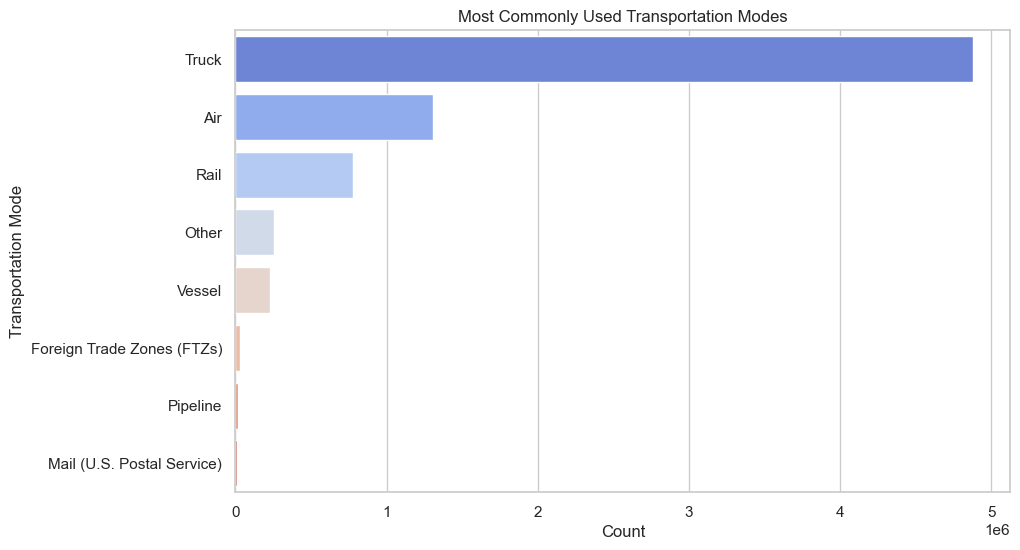

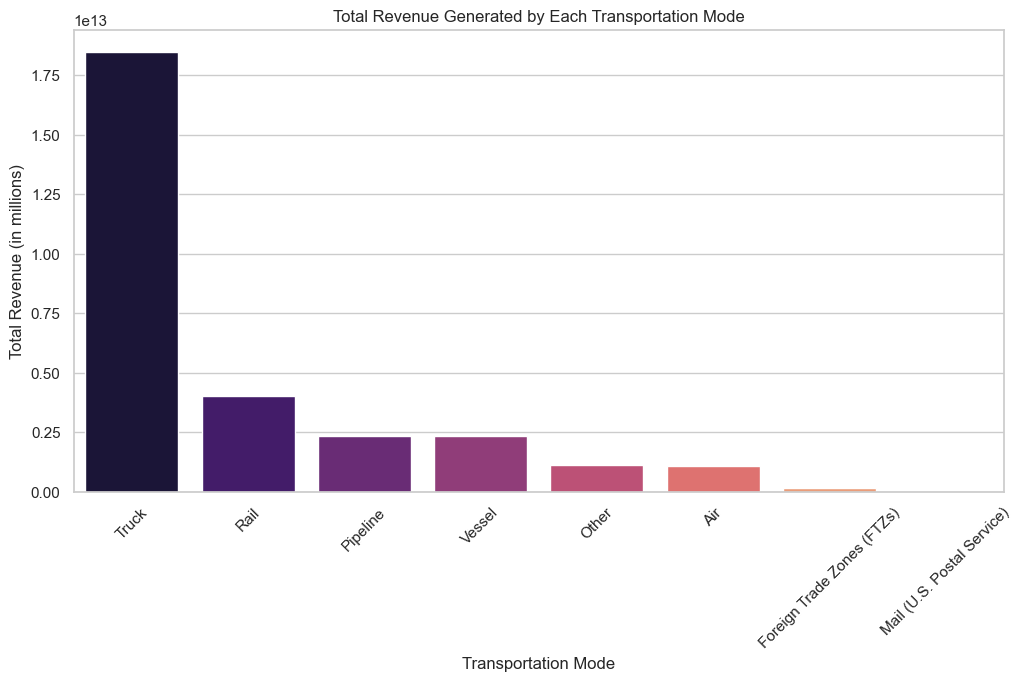

<Figure size 640x480 with 0 Axes>

In [50]:
# Most frequent mode of Transport used
plt.figure(figsize=(10, 6))
sns.countplot(y=data['DISAGMOT'], order=data['DISAGMOT'].value_counts().index, palette="coolwarm")
plt.title("Most Commonly Used Transportation Modes")
plt.xlabel("Count")
plt.ylabel("Transportation Mode")
plt.show()



# Total Revenue generated by each transportation mode
revenue_by_mode = data.groupby('DISAGMOT')['VALUE'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=revenue_by_mode.index, y=revenue_by_mode.values, palette="magma")
plt.title("Total Revenue Generated by Each Transportation Mode")
plt.xlabel("Transportation Mode")
plt.ylabel("Total Revenue (in millions)")
plt.xticks(rotation=45)
plt.show()

save_figure(fig, 'Most frequent mode of Transport')

Trucking leads in transborder freight activity, serving as the primary transportation method across North American trade corridors. Its dominance stems from its adaptability, extensive reach, and cost-efficiency, making it the go-to choice for most shipments. Air freight ranks second in usage, typically reserved for urgent, high-value cargo due to its speed and reliability. Rail and maritime transport follow, playing vital roles in moving heavy, bulk goods such as raw materials, agricultural products, and energy commodities.

While trucking handles the majority of shipments, rail and vessel transport contribute substantially to overall revenue, thanks to their capacity for moving high-volume, high-value goods efficiently. Air transport, though less frequent in volume, commands significant value per shipment, making it crucial for premium products like pharmaceuticals, electronics, and luxury items. Though maritime shipping is less prominent in regional trade, it still plays a strategic role in revenue generation through large-scale, high-value imports and exports.


State-Level Shipment Volumes Over Time:
YEAR                        2020.0         2021.0         2022.0  \
USASTATE                                                           
Alabama                10802735948    35398753020    30702028996   
Alaska                  1560758524     3790209008     3897929736   
Arizona                24083151696    47779800424    32091293772   
Arkansas                1043686784     3293308280     2928043152   
California             39732451123   108044909016   111950783200   
Colorado               12644134989    34588662684    34050914608   
Connecticut             4039661918    10382589824     9337140059   
Delaware                4622450021    15072050925    17467631234   
District of Columbia      17862514       78496485      159167762   
Florida                13372319860    36582233821    36262443038   
Georgia                 7387749173    20051414012    23187380024   
Hawaii                   273658743      258792551      106423244   
Idaho  

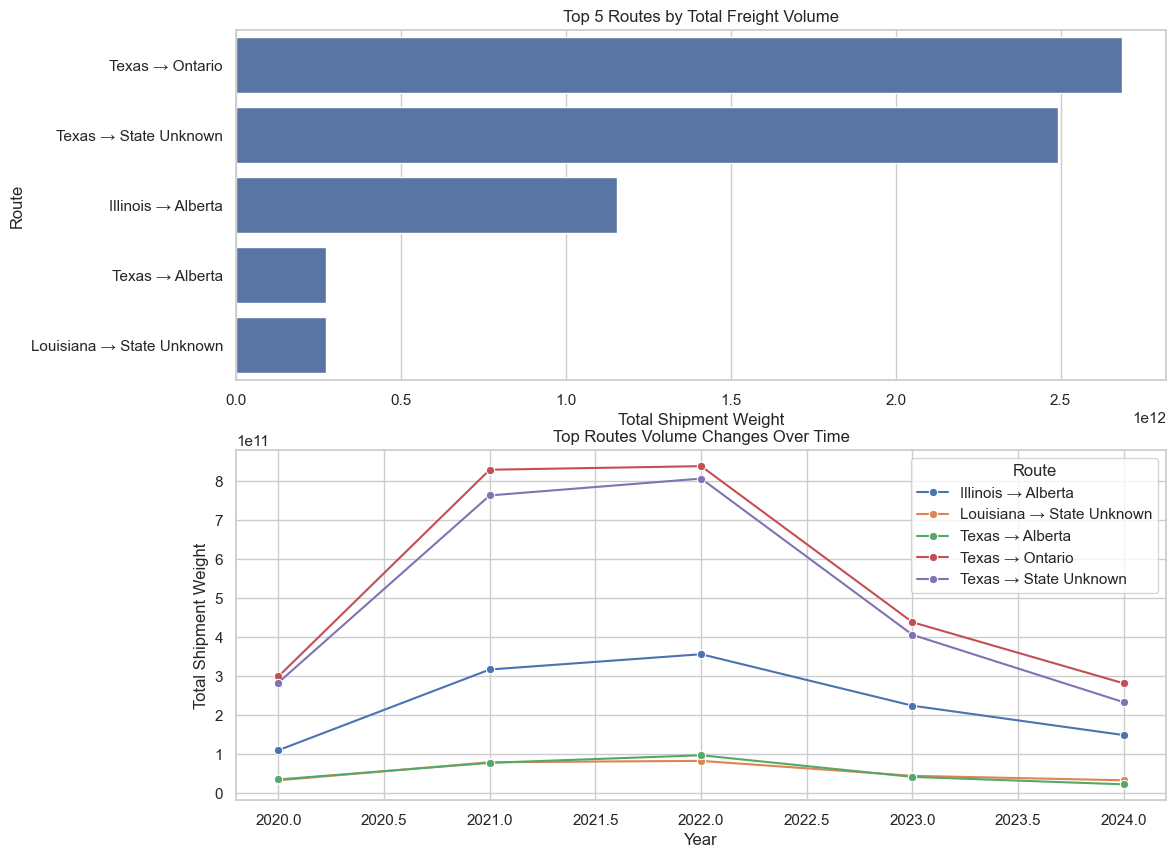

In [49]:
 # Analyze top routes by origin-destination pairs
route_data = data.groupby(['USASTATE', 'CANPROV', 'YEAR'])['SHIPWT'].sum().reset_index()
    
    # Get top 5 routes by volume
top_routes = route_data.groupby(['USASTATE', 'CANPROV'])['SHIPWT'].sum().reset_index().sort_values('SHIPWT', ascending=False).head(5)
    
    # Analyze these top routes over time
top_route_pairs = list(zip(top_routes['USASTATE'], top_routes['CANPROV']))
top_routes_over_time = route_data[route_data.apply(lambda x: (x['USASTATE'], x['CANPROV']) in top_route_pairs, axis=1)]
    
    # Create a figure for the visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Plot top routes overall
sns.barplot(x='SHIPWT', y=top_routes.apply(lambda x: f"{x['USASTATE']} → {x['CANPROV']}", axis=1), data=top_routes, ax=ax1)
ax1.set_title('Top 5 Routes by Total Freight Volume')
ax1.set_xlabel('Total Shipment Weight')
ax1.set_ylabel('Route')
    
    # Plot top routes over time
top_routes_over_time['Route'] = top_routes_over_time.apply(lambda x: f"{x['USASTATE']} → {x['CANPROV']}", axis=1)
sns.lineplot(x='YEAR', y='SHIPWT', hue='Route', data=top_routes_over_time, marker='o', ax=ax2)
ax2.set_title('Top Routes Volume Changes Over Time')
ax2.set_xlabel('Year')
ax2.set_ylabel('Total Shipment Weight')
        
    # Analyze state-level shipment volumes
state_data = data.groupby(['USASTATE', 'YEAR'])['SHIPWT'].sum().reset_index()
pivot_state = state_data.pivot(index='USASTATE', columns='YEAR', values='SHIPWT')
    
print("\nState-Level Shipment Volumes Over Time:")
print(pivot_state.round(0))

- The Texas to Ontario route handles significant freight volume (as seen in the data)
- Canadian provinces (Alberta, Ontario) are major destinations for US exports
- The analysis tracks how route importance has shifted over time, showing which corridors are gaining or losing freight volume

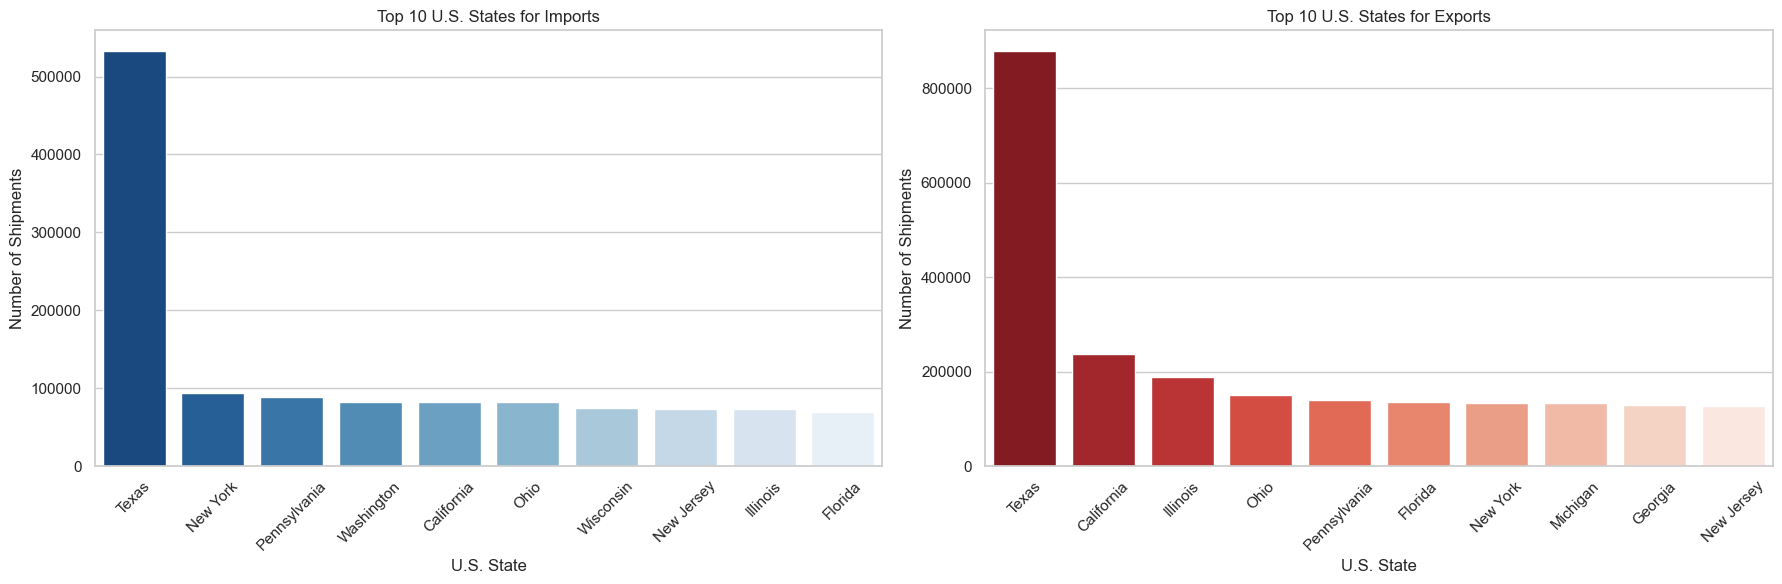

<Figure size 640x480 with 0 Axes>

In [51]:
# Filter only merchandise trade
merchandise_df = data[data['TRDTYPE'].isin(['Import', 'Export'])]

# Check if the dataset is empty after filtering
if merchandise_df.empty:
    print("No 'Import' or 'Export' data found. Check TRDTYPE values.")
else:
    # Get top 10 states for Import
    top_import_states = (
        merchandise_df[merchandise_df['TRDTYPE'] == 'Import']['USASTATE']
        .value_counts()
        .head(10)
    )

    # Get top 10 states for Export
    top_export_states = (
        merchandise_df[merchandise_df['TRDTYPE'] == 'Export']['USASTATE']
        .value_counts()
        .head(10)
    )

    # Plot imports and exports side by side
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

    # Import Plot
    sns.barplot(
        x=top_import_states.index,
        y=top_import_states.values,
        palette="Blues_r",
        ax=axes[0]
    )
    axes[0].set_title("Top 10 U.S. States for Imports")
    axes[0].set_xlabel("U.S. State")
    axes[0].set_ylabel("Number of Shipments")
    axes[0].tick_params(axis='x', rotation=45)

    # Export Plot
    sns.barplot(
        x=top_export_states.index,
        y=top_export_states.values,
        palette="Reds_r",
        ax=axes[1]
    )
    axes[1].set_title("Top 10 U.S. States for Exports")
    axes[1].set_xlabel("U.S. State")
    axes[1].set_ylabel("Number of Shipments")
    axes[1].tick_params(axis='x', rotation=45)

    # Adjust layout
    plt.tight_layout()
    plt.show()

    save_figure(fig, 'Top 10 states for Export')

The side-by-side bar charts showcase the leading U.S. states in terms of shipment volume for imports (left) and exports (right). Here's what stands out:

**Texas Takes the Lead in Both Directions 🇺🇸**
Texas stands far above the rest in both import and export activity.

- Imports: With over 400,000 inbound shipments, Texas processes more imports than any other state.
- Exports: It dominates even more in outbound shipments, exceeding 800,000, nearly quadrupling the total of the next closest state, California.

This commanding position is driven by several factors:
- Its geographical proximity to Mexico,
- A robust network of interstate highways, border crossings, and major ports,
- And its key industries—energy, electronics, and manufacturing—that fuel high trade volume.

**California & Illinois: Consistent High Performers**
- California ranks second for both imports and exports. Its massive trade infrastructure, including the Los Angeles and Long Beach ports, combined with its global connections and tech exports, secures its position.
- Illinois is close behind, ranking in the top three for both categories. As a major freight and logistics hub, it plays a central role in moving goods across the U.S. and beyond.

**Other Notable Trade States**
- Imports: States like New York, Florida, Pennsylvania, Michigan, and Washington stand out due to their access to major ports and industrial activity.
- Exports: Ohio, Pennsylvania, and New Jersey emerge as key contributors, likely fueled by strong manufacturing bases and well-developed distribution networks.

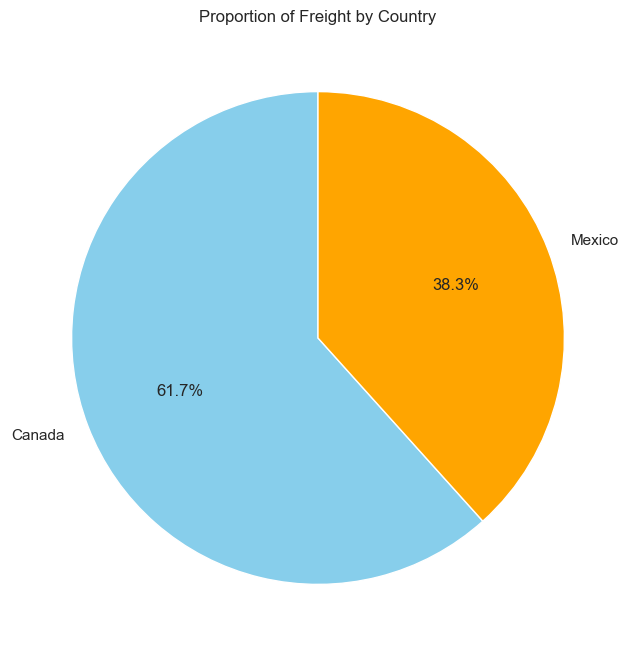

<Figure size 640x480 with 0 Axes>

In [52]:
plt.figure(figsize=(8, 8))
data['COUNTRY'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=["skyblue", "orange"])
plt.title("Proportion of Freight by Country")
plt.ylabel("")  # Hide y-label
plt.show()

save_figure(fig, 'Percentage of Freight by Country')

The pie chart illustrates the distribution of freight value between Canada and Mexico. The key takeaways from the chart are:
- Canada (61.7%) - Larger Share of Freight:
The majority of freight transactions are associated with Canada, making up 60.4% of the total. This dominance could be due to stronger trade relations, higher-value goods being transported, or more efficient trade routes. The U.S.-Canada trade relationship has historically been significant, with industries like automotive, energy, and manufacturing driving large freight volumes.
- Mexico (38.3%) - Smaller but Significant Contribution:
Mexico accounts for 39.6% of the freight value, a substantial portion but notably lower than Canada. This could be attributed to different trade structures, reliance on specific goods (such as electronics, auto parts, and agricultural products), and varying trade policies. The U.S.-Mexico trade corridor is still crucial, especially with the rise of nearshoring, where companies relocate manufacturing closer to the U.S.

COMMODITY2
84.0    12329482451303
87.0     3117791711140
27.0     2980645551907
85.0     2189636854798
39.0      785144224830
Name: VALUE, dtype: int64


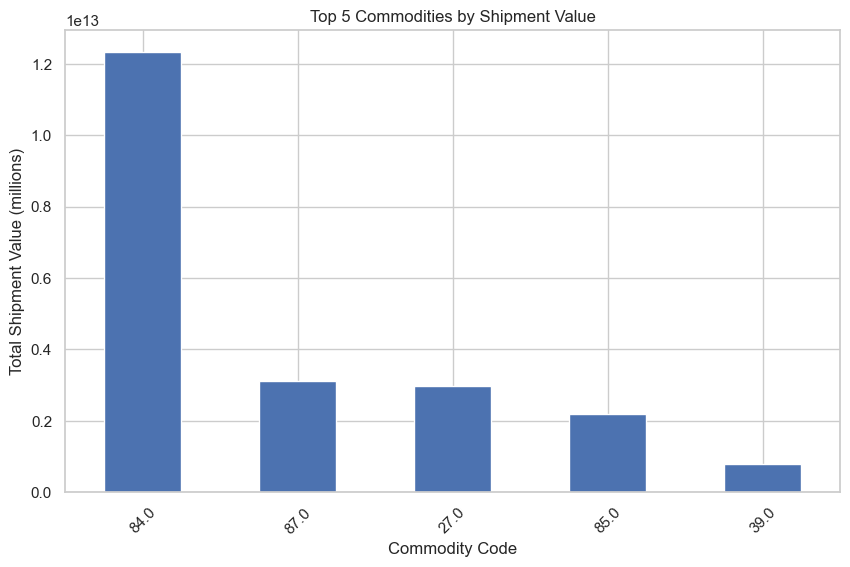

<Figure size 640x480 with 0 Axes>

In [53]:
# Calculate the total shipment value for each commodity
commodity_value = data.groupby('COMMODITY2')['VALUE'].sum()

# Sort the commodities by total shipment value in descending order
sorted_commodities = commodity_value.sort_values(ascending=False)

# Select the top 5 commodities
top_5_commodities = sorted_commodities.head(5)

# Print the top 5 commodities and their total shipment values
print(top_5_commodities)

# Plot the top 5 commodities using a bar chart
top_5_commodities.plot(kind='bar',figsize=(10, 6))
plt.title("Top 5 Commodities by Shipment Value")
plt.xlabel("Commodity Code")
plt.ylabel("Total Shipment Value (millions)")
plt.xticks(rotation=45)
plt.show()

save_figure(fig, 'Top 5 commodities')

CONTCODE
Non-Containerized    4935288
Containerized        2573719
Name: count, dtype: int64


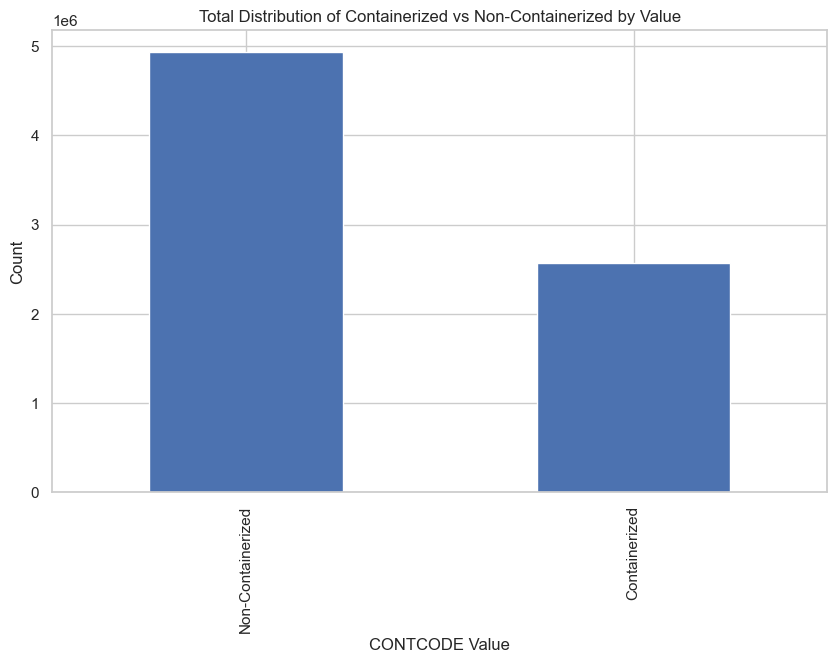

<Figure size 640x480 with 0 Axes>

In [54]:
# Count the occurrences of each value in 'CONTCODE'
contcode_counts = data['CONTCODE'].value_counts()

# Print the counts
print(contcode_counts)

# Plot the distribution as a bar chart
contcode_counts.plot(kind='bar', figsize=(10, 6))
plt.title("Total Distribution of Containerized vs Non-Containerized by Value")
plt.xlabel("CONTCODE Value")
plt.ylabel("Count")
plt.show()

save_figure(fig, 'Distribution of Containerized vs Non-Containerized by Value')